## Load dataset

In [2]:
import pandas as pd       
training = pd.read_csv("../data/labeledTrainData.tsv.zip", header=0, \
                       delimiter="\t", quoting=3)
print(training.shape)

y_train = training['sentiment']
x_train = training.drop(["sentiment"], axis=1)
                      
training.head()

(25000, 3)


,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [19]:
train_len=training['review'].apply(len)
train_len.describe()

count    25000.000000
mean      1329.710560
std       1005.239246
min         54.000000
25%        705.000000
50%        983.000000
75%       1619.000000
max      13710.000000
Name: review, dtype: float64

## Data exploration

C:\Users\Admin_PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

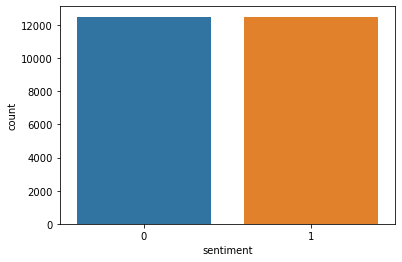

In [3]:
import seaborn as sns
sns.countplot(y_train)

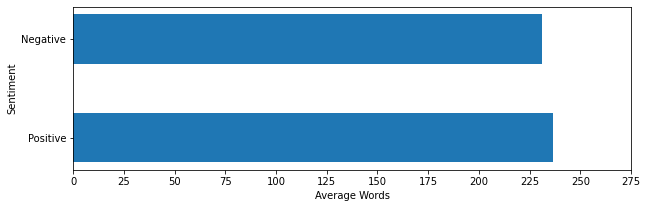

In [4]:
import matplotlib.pyplot as plt 
import numpy as np

avg_pos_reviews = training[training.sentiment==1].review.apply(lambda x: len(x.split())).mean()
avg_neg_reviews = training[training.sentiment==0].review.apply(lambda x: len(x.split())).mean()

plt.figure(figsize=(10, 3))
plt.barh(['Positive', 'Negative'], [avg_pos_reviews, avg_neg_reviews], height=0.5)
plt.xticks(np.arange(0, 300, 25))
plt.xlabel('Average Words')
plt.ylabel('Sentiment')
plt.show()

## Data Preprocessing

In [5]:
import nltk
import numpy as np
import matplotlib.pyplot as plt

#### Stopwords

In [6]:
from nltk.corpus import stopwords

stopwords_list = set(stopwords.words("english"))
print(f'List of stopwords:\n{stopwords_list}\n')

no_stopwords = ["not","don't",'aren','don','ain',"aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't",
               'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't",
               "won't", 'wouldn', "wouldn't"]
for no_stopword in no_stopwords:
    stopwords_list.remove(no_stopword)
    
print(f'Final list of stopwords:\n{stopwords_list}')

List of stopwords:
{'then', 'out', 'he', 'can', 'mustn', "aren't", 'against', 'this', 'themselves', 'further', 'had', "haven't", "you'll", 'such', 'we', "you've", 'himself', 'during', "mightn't", "wasn't", 'weren', "shouldn't", 'those', 'above', 'm', 't', 'haven', 'because', 'at', 'too', 'was', 'now', 'below', 'to', 'has', 'didn', 'yourselves', 'did', 'is', 'our', "weren't", 'what', 'there', 'o', 're', 'by', 'wouldn', 'ma', 'some', 'them', "don't", 'be', 'or', "she's", 'she', 'having', 'about', 'when', 'you', 'd', "isn't", 'how', 'before', 'doesn', 'won', 'are', 'and', 'same', 'ours', 'i', 'not', 'own', 'isn', 'than', "won't", 'wasn', 'between', 'few', 'each', 'they', 'been', 'here', 'shan', 'more', "didn't", 'which', 'over', 'does', 'very', 'couldn', 'the', 'yours', 'am', 'under', 'from', "you'd", 've', 'who', 'hers', 'myself', 'have', "needn't", 'being', 'where', 'as', 'down', 'most', 'no', "wouldn't", 'while', 'so', 'its', 'that', "should've", 'nor', 'a', 'only', 'it', 'hasn', 'with

#### Lemmatize

In [7]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemma_stem_text(words_list):
    # Lemmatizer
    text = [lemmatizer.lemmatize(token.lower()) for token in words_list]# eighties->eight or messages->message or drugs->drug
    text = [lemmatizer.lemmatize(token.lower(), "v") for token in text]# going-> go or started->start or watching->watch
    return text

#### Negations

In [8]:
import re
re_negation = re.compile("n't ")

def negation_abbreviated_to_standard(sent):
    sent = re_negation.sub(" not ", sent)
    return sent

In [9]:
# Import function BeautifulSoup to clean text of HTML tags
from bs4 import BeautifulSoup 

def review_to_words(raw_review):
    # 1. Remove HTML tags
    review_text = BeautifulSoup(raw_review).get_text() 
    
    # 2. Transform abbreviated negations to the standard form.
    review_text = negation_abbreviated_to_standard(review_text)
    
    # 3. Remove non-letters and non-numbers   
    letters_numbers_only = re.sub("[^a-zA-Z_0-9]", " ", review_text) 
    
    # 4. Convert to lower case and split into individual words (tokenization)
    words = np.char.lower(letters_numbers_only.split())                             
    
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stopwords_list]   
    
    # 6. Apply lemmatization function
    lemma_words = lemma_stem_text(meaningful_words)
    
    # 7. Join the words back into one string separated by space, and return the result.
    return( " ".join(lemma_words))   

In [10]:
clean_review = review_to_words(x_train["review"][0] )

# Print original review, sentiment and cleaned review
print(f'Text of original review:\n{x_train["review"][0]}\n')
print(f'Sentiment review: {y_train[0]}\n')
print(f'Text of cleaned review:\n{clean_review}') 

Text of original review:
"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature fil

We clean the text of all reviews in the training set.

In [11]:
reviews = x_train['review']

cleaned_train_reviews = []

for i in reviews:
    cleaned_train_reviews.append(review_to_words(i))

## Vectorization

In [12]:
# Import tf-idf encoding from sklearn library
from sklearn.feature_extraction.text import TfidfVectorizer

# Define some hiperparameters of encoded
vectorizer = TfidfVectorizer(max_features=20000, ngram_range = (1,2))

# Create the training set with the words encoded as features of the reviews
train_data_features = vectorizer.fit_transform(cleaned_train_reviews)

print(train_data_features.shape)

(25000, 20000)


## Model

In [13]:
# Import the logistic regression model from sklearn 
from sklearn.linear_model import LogisticRegression

# Define the model
model = LogisticRegression(random_state=0, solver='lbfgs',
                            multi_class='multinomial')
# Train model
model.fit(train_data_features, y_train)


C:\Users\Admin_PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial', random_state=0)

## Predictions in Test dataset

In [ ]:
test = pd.read_csv("../input/word2vec-nlp-tutorial/testData.tsv.zip", header=0, delimiter="\t", \
                   quoting=3 )
print(test.shape)

num_reviews = len(test["review"])
clean_test_reviews = [] 

print("Cleaning and parsing the test set movie reviews...\n")
for i in range(0,num_reviews):
    clean_review = review_to_words( test["review"][i] )
    clean_test_reviews.append( clean_review )

test_data_features = vectorizer.transform(clean_test_reviews)


result = model.predict(test_data_features)

output = pd.DataFrame( data={"id":test["id"], "sentiment":result} )

In [15]:
output.to_csv("result.csv", index=False, quoting=3 )

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data_features, y_train, test_size=0.2, random_state=42)

In [21]:
logistic = LogisticRegression(random_state=0, solver='lbfgs',
                            multi_class='multinomial')

logistic = logistic.fit(X_train, y_train)

print(logistic.score(X_test, y_test))

0.8976
